### Step 1: Install and Import Packages
This step ensures that all required Python libraries are installed and successfully imported.

In [1]:
#install packages
print("hello world")
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#test if all packages are imported successfully
print("all packages importd successfully")

hello world
all packages importd successfully


### Step 2: Load the Dataset
Read the CSV file containing global music streaming listener preferences and check the details of the data.

In [11]:
#read csv file
streaming_data = pd.read_csv('Global_Music_Streaming_Listener_Preferencescopy.csv')
#check the details of the data
print(streaming_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User_ID                                   5000 non-null   object 
 1   Age                                       5000 non-null   int64  
 2   Country                                   5000 non-null   object 
 3   Streaming Platform                        5000 non-null   object 
 4   Top Genre                                 5000 non-null   object 
 5   Minutes Streamed Per Day                  5000 non-null   int64  
 6   Number of Songs Liked                     5000 non-null   int64  
 7   Most Played Artist                        5000 non-null   object 
 8   Subscription Type                         5000 non-null   object 
 9   Listening Time (Morning/Afternoon/Night)  5000 non-null   object 
 10  Discover Weekly Engagement (%)      

### Step 3: Data Cleaning

Before analysis, check for duplicate entries and missing values to ensure data quality.

In [ ]:
#check for duplicates
print(streaming_data.duplicated().any())

#check for how many duplicates
print(streaming_data.duplicated().sum())

#view duplicated rows
streaming_data[streaming_data.duplicated()]

#check for any missing values
print(streaming_data.isna().sum,'\n')

False
0
<bound method NDFrame._add_numeric_operations.<locals>.sum of       User_ID    Age  Country  Streaming Platform  Top Genre  \
0       False  False    False               False      False   
1       False  False    False               False      False   
2       False  False    False               False      False   
3       False  False    False               False      False   
4       False  False    False               False      False   
...       ...    ...      ...                 ...        ...   
4995    False  False    False               False      False   
4996    False  False    False               False      False   
4997    False  False    False               False      False   
4998    False  False    False               False      False   
4999    False  False    False               False      False   

      Minutes Streamed Per Day  Number of Songs Liked  Most Played Artist  \
0                        False                  False               False   
1      

After checking the dataset:
- **Duplicate rows:** None were found, indicating that there are no repeated user records.  
- **Missing values:** All columns have complete data, so no imputation or removal of rows is needed.  

This means the dataset is clean and ready for analysis without requiring additional preprocessing steps.

### 🎧 Question 1: Does streaming time significantly differ between Free and Premium users?

The boxplot below compares the distributions of **daily streaming minutes** between Free and Premium users.

**Interpretation:**  
- The boxplot visually shows the **median** and **spread** of streaming time for both user groups.  
- If the medians or interquartile ranges differ noticeably, this suggests potential differences in engagement levels between Free and Premium users.  
- A statistical test (Independent t-test or Mann–Whitney U test) can confirm if this difference is **statistically significant**.

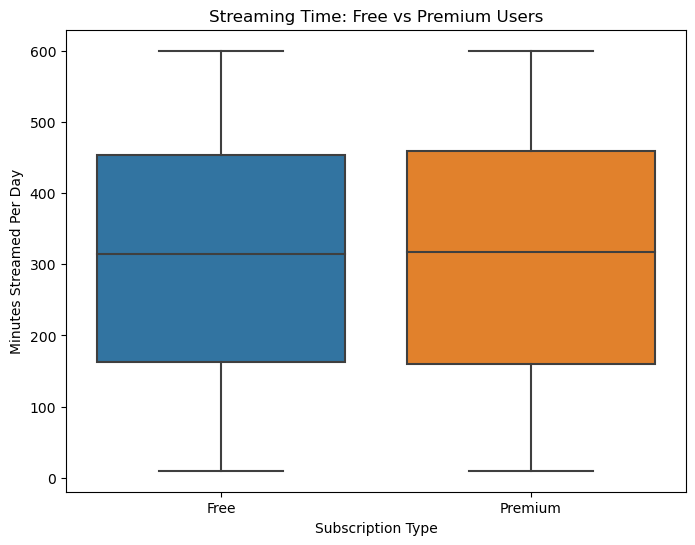

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Subscription Type', y='Minutes Streamed Per Day', data=streaming_data)
plt.title('Streaming Time: Free vs Premium Users')
plt.xlabel('Subscription Type')
plt.ylabel('Minutes Streamed Per Day')
plt.show()

**Results:**  
| Metric | Free Users | Premium Users |
|:-------|:-----------:|:--------------:|
| Median | 314 mins | 317 mins |
| Mean | 309.6 mins | 308.9 mins |
| Minimum | 10 mins | 10 mins |
| Maximum | 600 mins | 600 mins |

The box plot and summary statistics show that **Free and Premium users have nearly identical streaming behaviors**. Both groups share the same range (10–600 minutes), and their averages and medians differ by less than 3 minutes, an almost negligible gap.  

This indicates that **subscription type does not strongly influence streaming duration** in this dataset. Both Free and Premium users stream for roughly 5 hours per day on average.  

However, these results seem **unnatural compared to real-world patterns**, where Premium users typically stream more due to ad-free and offline playback benefits. This suggests that the dataset may be **synthetic or lacks behavioral variability**, which could mask the true differences in user engagement.


### Statistical Test: Independent Sample T-Test

To determine whether the difference in streaming time between **Free** and **Premium** users is statistically significant, an independent samples t-test (Welch’s t-test) was conducted.


In [ ]:
from scipy import stats

free_users = streaming_data[streaming_data['Subscription Type'] == 'Free']['Minutes Streamed Per Day']
premium_users = streaming_data[streaming_data['Subscription Type'] == 'Premium']['Minutes Streamed Per Day']

t_stat, p_value = stats.ttest_ind(free_users, premium_users, equal_var=False)  # Welch’s t-test
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference in streaming time between Free and Premium users is statistically significant.")
else:
    print("No significant difference in streaming time between Free and Premium users.")

T-statistic: 0.140
P-value: 0.88857
No significant difference in streaming time between Free and Premium users.


**Result:**

The p-value (0.8886) is much higher than the conventional significance threshold of 0.05, indicating **no statistically significant difference** in average streaming time between Free and Premium users.  

In other words, users on both subscription types appear to spend **similar amounts of time streaming each day**.  

This result is somewhat unexpected. In real-world data, Premium users often stream more due to ad-free access and offline features.  
The lack of difference here may suggest that the **dataset does not accurately capture realistic user behavior** or that streaming time is influenced by other factors (e.g., user preferences, device habits) rather than subscription type.


### Question 2: Which streaming platforms dominate in terms of average daily minutes per user?

The chart below compares **average daily streaming time** across different platforms — a useful proxy for user engagement and platform stickiness.


**Interpretation:**  
- The bar chart shows how much time, on average, users spend streaming music on each platform.  
- Platforms with **higher average minutes per user** are likely to have stronger engagement or a more user-friendly experience.  
- This metric can serve as an indicator of **platform stickiness**, helping to identify which services retain users’ attention the most.

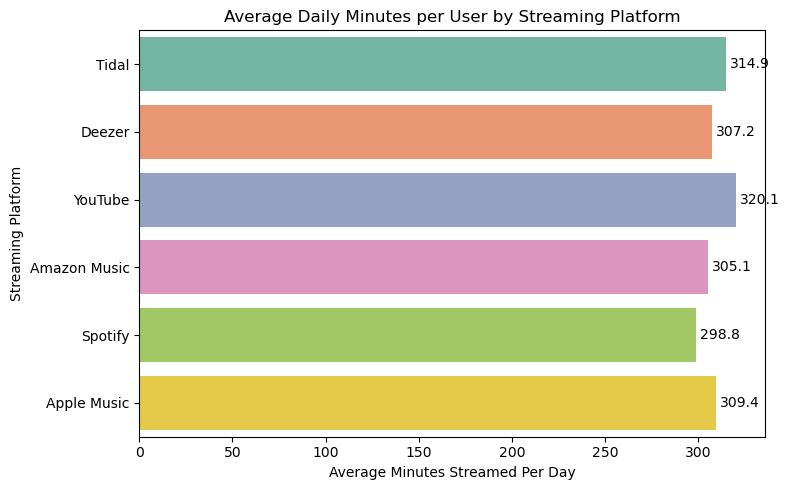

In [23]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=streaming_data,
    y='Streaming Platform',
    x='Minutes Streamed Per Day',
    estimator='mean',
    errorbar=None,  # replaces ci=None
    palette='Set2'
)
plt.title('Average Daily Minutes per User by Streaming Platform')
plt.xlabel('Average Minutes Streamed Per Day')
plt.ylabel('Streaming Platform')

# Label the values on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()


**Results:**
- **YouTube Music** users show the **highest average streaming time**, suggesting stronger engagement or possibly more passive listening (e.g., long playlists or video streams).  
- **Tidal** and **Apple Music** follow closely, also showing high user engagement levels.  
- **Spotify**, despite being one of the largest platforms globally, shows the **lowest average daily streaming time** (298.8 minutes).  

However, the differences between platforms are **relatively small** — all averages fall within roughly **20 minutes of each other**.  
This narrow range suggests that **overall engagement levels are quite consistent** across platforms in this dataset.

Such uniformity may indicate that:
- The dataset has been **normalized or artificially balanced**, or  
- Users across platforms in this sample exhibit **similar streaming behaviors**, which is somewhat unlikely in real-world data.

Therefore, while YouTube Music appears to lead slightly, the differences are **not large enough to suggest a clear dominant platform** in user engagement.

### Question 3: Are there regional differences in the popularity of streaming platforms?

This analysis explores whether **streaming platform preferences vary by country**.  
A stacked bar chart is used to visualize the distribution of users across different platforms within each region.


**Interpretation:**  
- Each bar represents a country, and the different coloured segments show the **proportion of users on each streaming platform**.  
- This visualization helps identify **regional preferences** — for instance, one platform might dominate in a specific country while others are more evenly distributed.  
- Such insights are valuable for **market expansion and localization strategies**, allowing companies to tailor their offerings to regional trends.


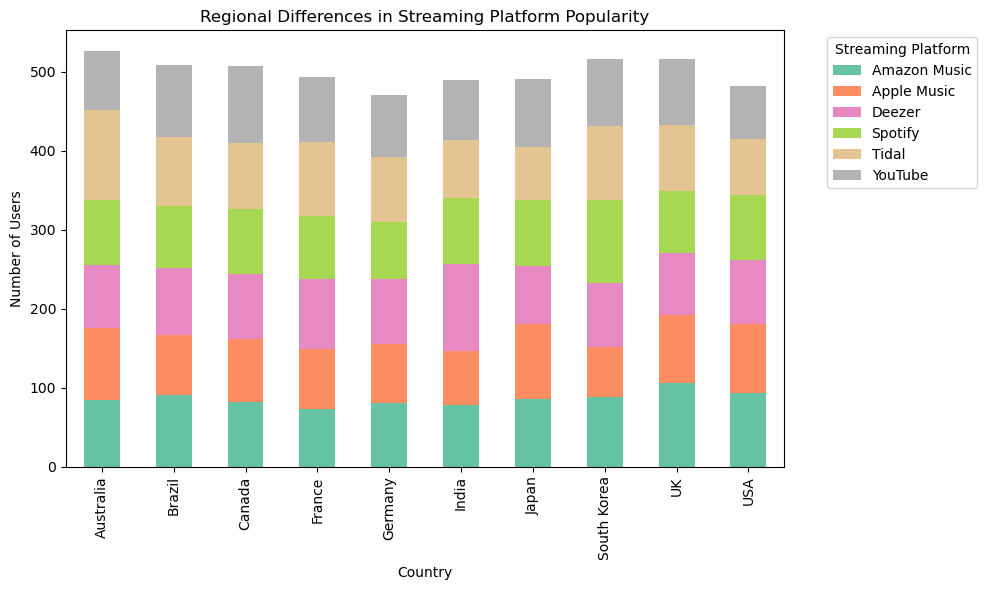

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Count users per platform per country
platform_country = streaming_data.groupby(['Country', 'Streaming Platform']).size().unstack(fill_value=0)

# Plot stacked bar chart
platform_country.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

plt.title('Regional Differences in Streaming Platform Popularity')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.legend(title='Streaming Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Results:**
- **Australia** has the **highest total number of streaming users**, followed closely by **South Korea** and the **UK**.  
- **Germany**, on the other hand, has the **lowest overall number of users** among all the countries shown.  
- Across all regions, the proportions of users for each platform (Amazon Music, Apple Music, Deezer, Spotify, Tidal, and YouTube) appear **fairly consistent**, with no single platform dominating in any specific country.  

**Insights:**
- The relatively even distribution across platforms suggests **similar popularity levels** in each region, which may indicate either:
  - A **balanced dataset** intentionally designed for comparison, or  
  - A **lack of real-world variation**, since actual market data would likely show stronger regional preferences.  
- The variation in total user counts (e.g., higher in Australia and lower in Germany) could reflect **sampling differences** or **population disparities** across countries.

Overall, while the chart provides a clear view of regional usage patterns, the **uniformity across platforms** and the **unexpectedly high user count in certain regions** hint that the dataset might not fully reflect real-world market dynamics.


### Question 4: Which platform has the largest global market share in this dataset?

To understand platform dominance on a global scale, we calculate the **user count per streaming platform** and display it as a **donut chart** (a variation of a pie chart).

**Interpretation:**  

- This pie chart visualizes each platform’s **share of total users** in the dataset.  
- The percentages show the **proportion of users** associated with each platform globally.  
- The platform with the **largest segment** holds the greatest market share, indicating stronger brand presence or user adoption across regions. 

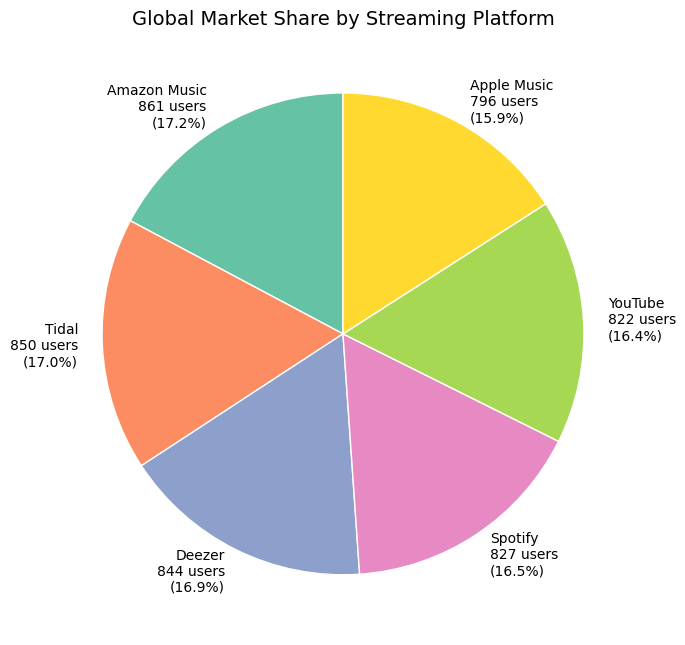

In [25]:
# Get platform counts
platform_counts = streaming_data['Streaming Platform'].value_counts()
platform_percentages = platform_counts / platform_counts.sum() * 100

# Create labels: "Platform - count (xx.x%)"
labels = [
    f"{name}\n{count} users\n({perc:.1f}%)"
    for name, count, perc in zip(platform_counts.index, platform_counts.values, platform_percentages.values)
]

# Plot donut chart
plt.figure(figsize=(7, 7))
plt.pie(
    platform_counts,
    labels=labels,
    startangle=90,
    colors=sns.color_palette('Set2'),
    wedgeprops={'width': 1.0, 'edgecolor': 'white'}  # makes donut shape
)
plt.title('Global Market Share by Streaming Platform', fontsize=14)
plt.tight_layout()
plt.show()


**Results:**

The results show that each platform holds a **nearly equal share** of total users, with differences of less than 2%.  
This uniform distribution is **highly unlikely in real-world conditions**, where the streaming market is typically dominated by a few major players (e.g., Spotify and Apple Music).

Such even proportions suggest that the dataset is **synthetic or intentionally balanced** rather than reflecting real user distributions.  

While the data allows for practicing visualization and analysis methods, these findings should **not be interpreted as representative of actual market dynamics**.

### Question 5: What is the correlation between the number of songs liked and minutes streamed per day?

This analysis explores whether users who like more songs also tend to stream for longer durations.  
A scatterplot with a regression line is used to visualize the strength and direction of the relationship.

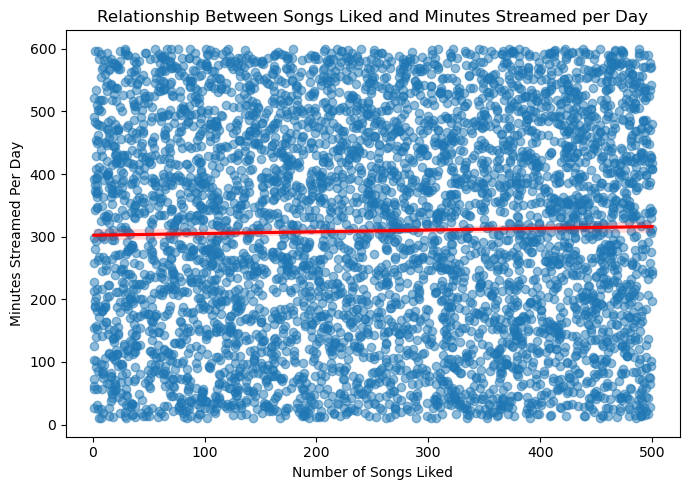

In [26]:
plt.figure(figsize=(7, 5))
sns.regplot(
    data=streaming_data,
    x='Number of Songs Liked',
    y='Minutes Streamed Per Day',
    scatter_kws={'alpha': 0.5},  # make points semi-transparent
    line_kws={'color': 'red'}    # regression line in red
)
plt.title('Relationship Between Songs Liked and Minutes Streamed per Day')
plt.xlabel('Number of Songs Liked')
plt.ylabel('Minutes Streamed Per Day')
plt.tight_layout()
plt.show()


In [27]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(
    streaming_data['Number of Songs Liked'],
    streaming_data['Minutes Streamed Per Day']
)

print(f"Pearson correlation: {corr:.3f}")
print(f"P-value: {p_value:.3e}")


Pearson correlation: 0.023
P-value: 9.680e-02


**Pearson Correlation Results:**  
- The correlation coefficient (r = 0.023) is **very close to zero**, indicating **no meaningful linear relationship** between the number of songs liked and the minutes streamed per day.  
- The p-value (0.0968) is **greater than 0.05**, meaning this relationship is **not statistically significant**.  
- In other words, users who like more songs do **not necessarily spend more time streaming** — the two behaviors appear to be largely independent in this dataset.


**Scatterplot Results:**

The scatterplot shows that the points are **evenly distributed** across the graph, with no clear trend between the number of songs liked and minutes streamed per day. Combined with the near-zero correlation (r = 0.023), this suggests that:

- There is **no meaningful linear relationship** between how many songs a user likes and how long they stream music daily.  
- Users who like many songs do **not necessarily** stream more frequently, and users who like few songs might still stream for long hours.  

This pattern can occur for several reasons:
1. **Behavioral diversity** :Different users may use “likes” differently (some like every song they hear, others rarely use the feature).  
2. **Platform design** :Liking songs may not reflect engagement time; some users might stream curated playlists without liking songs.  
3. **Data normalisation or synthetic generation** :If this dataset is simulated or overly balanced, it could produce evenly spread points with no natural clustering.

Upon examining the scatterplot for Question 5, the data points appear **uniformly scattered** across the entire range, showing **no meaningful trend** between the number of songs liked and minutes streamed per day.  

Although the Pearson correlation (r = 0.023) already indicates a negligible relationship, the **even distribution** of points suggests that the dataset may contain **synthetic or poorly varied data**.  

In other words, the dataset likely does **not reflect real-world user behavior** — users in real streaming data typically show at least some clustering or pattern between engagement and liking activity.  

Therefore, while the visualizations and analyses are methodologically correct, the **underlying data quality limits the reliability** of the conclusions drawn from this study.


---
### Overall Reflections

While the analyses were executed correctly using statistical and visualization methods, the results across all questions showed **weak or no significant patterns**. This consistency suggests potential **limitations in data quality**, such as:
- **Artificial balance or uniformity** (equal market shares, similar averages).  
- **Limited variability** across user behaviours or regions.  
- **Potential synthetic or incomplete dataset** that does not capture real-world diversity.  

### Recommendations for Improvement
1. **Collect a larger and more representative dataset** — with genuine user distributions across platforms, regions, and subscription types.  
2. **Include additional variables** (e.g., age, gender, device type, listening frequency) to uncover deeper insights.  
3. **Perform normality and outlier checks** to ensure validity of statistical tests like t-tests and correlations.  
4. **Compare with external benchmarks** (e.g., Spotify market data) to contextualise findings.  
5. **Use segmentation analysis** to identify subgroups with distinct streaming behaviours.


### Conclusion:

Although this dataset allowed for hands-on practice in statistical testing and visualization, the findings highlight the importance of **data representativeness** and **contextual interpretation** in analytics. Future work should prioritise richer, more realistic data to draw stronger and more meaningful conclusions.